<a href="https://colab.research.google.com/github/jrosko/Bits-of-Analysis/blob/master/TrackPy_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import pims
import trackpy as tp
import cv2

In [ ]:
path = r'C:\Users\elpresidente_2\Desktop\MatlabPA14\Particle Tracking\cropped_movie'
frames = pims.open(path + r'\*.tif')
proc_frames = []
# First detect particles in each frame
for frame in frames:
    frame_ = cv2.GaussianBlur(frame,(5,5),0)
    frame = cv2.adaptiveThreshold(frame_,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2)
    proc_frames.append(frame)

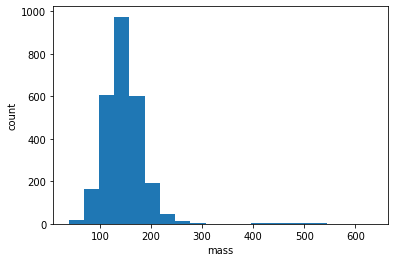

In [ ]:
# Plotting a histogram of masses of particles located by tp.locate()
# This is using non processed frames from the video
f = tp.locate(frames[0], 13, invert=True)
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
ax.set_xlabel('mass')
ax.set_ylabel('count')
plt.show()


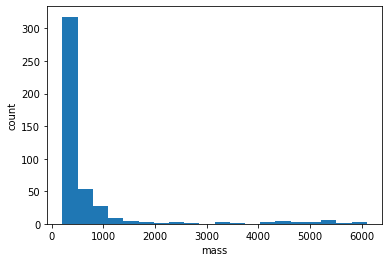

In [ ]:
# Histogram of masses of frames after gaussian filter and adaptive threshold
# Actual particles are mass > 2000
f = tp.locate(proc_frames[0], 13, invert=True)
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
ax.set_xlabel('mass')
ax.set_ylabel('count')
plt.show()

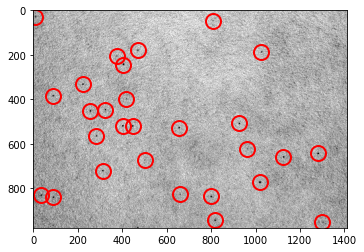

<AxesSubplot:>

In [ ]:
# Check how well the particle finder works after min mass = 2000 impose

f = tp.locate(proc_frames[0], 13, invert=True, minmass = 2000)
tp.annotate(f, frames[0])

Frame 135: 29 trajectories present.


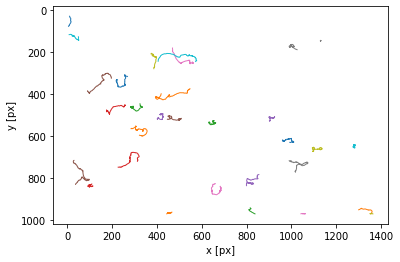

In [ ]:
# Batch process and show trajectories
loc = tp.batch(proc_frames, 13, invert=True, minmass=2000) # Found minmass from histogram
t = tp.link(loc, 9, memory = 4)
t1 = tp.filter_stubs(t, 20)
plt.figure()
tp.plot_traj(t1)
plt.show()

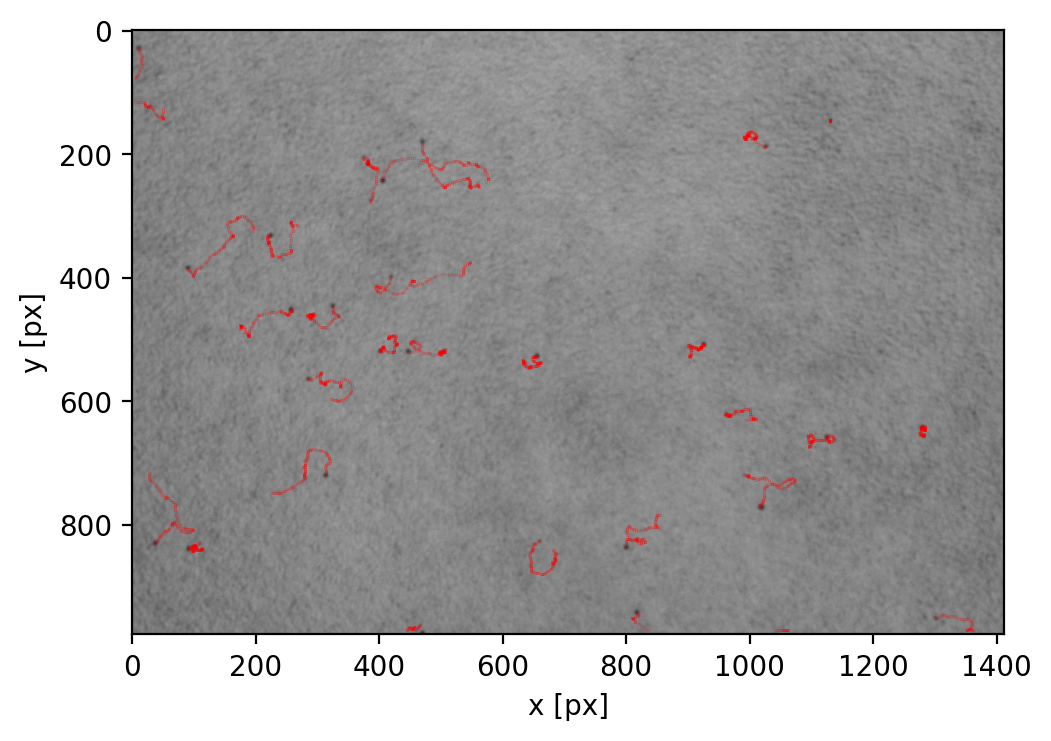

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [66]:
fig, ax = plt.subplots(1,1, dpi=200)
ax.imshow(frames[0],cmap='gray', vmin=10, vmax=80)
#ax_ = ax.twinx()
#tp.plot_traj(t1)
#ax_.set_ylim(0,1000)
#plt.show()
tp.scatter(t1, plot_style={'markersize':0.1, 'marker':'.', 'markeredgecolor':'red'})